In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ds=pd.read_csv("http://iali.in/datasets/Social_Network_Ads.csv")
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
ds['Purchased'].unique()

array([0, 1])

# Classification Problem
### "Purchased" column has ony 2 unique values, so it is Binary Classification problem

In [ ]:
ds.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#transforming non numerical labels to numeric labels
ds['Gender']=le.fit_transform(ds['Gender'])

In [ ]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
ds['Gender'].unique()
# Only two unique values, so need of One Hot Encoding
# one hot encoding is a representation of categorical variables as binary vectors.

array([1, 0])

In [ ]:
#we are seperating x and y values using iloc[]
x=ds.iloc[:,1:4].values
y=ds.iloc[:,4].values

In [ ]:
x.shape

(400, 3)

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(320, 3)

## StandardScaler 

 It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution.

## let's verify this with an example;

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
#data = 
#scaler =
#scaled_data =

#print(data)
#print(scaled_data)

In [ ]:
#Verify that the mean of each feature (column) is 0:


In [ ]:
#Verify that the std of each feature (column) is 1:


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
# Training the model using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred=dtc.predict(x_test)

In [ ]:
# Getting the Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8875

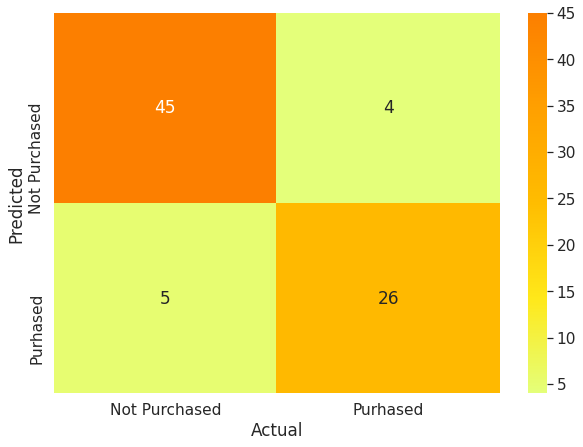

In [ ]:
labels = ["Not Purchased", "Purhased"]
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name ='Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Wistia", annot=True,annot_kws={"size": 17})

## ROC Curve
Receiver Operating Characteristic curve. It is nothing but a graph displaying the performance of a classification model. It is a very popular method to measure the accuracy of a classification model.

**(Note: this implementation is restricted to the binary classification task.)

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [ ]:
# Getting the roc
import sklearn.metrics as metrics   # to measure classification performance.
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

Text(0.5, 0, 'fpr')

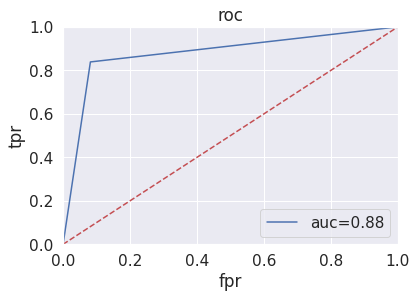

In [ ]:
# Plotting the roc-auc curve
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right") #automatically creates a legend for labeled plot elements
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])  #Get or set the x limits of the current axes.
plt.ylim([0,1])  #Get or set the y limits of the current axes.
plt.ylabel("tpr")
plt.xlabel("fpr")

In [ ]:
# Prediction for demo data 
dtc.predict(sc.fit_transform([[1,34,1900]]))

array([1])

In [ ]:
#RandomForest
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score, make_scorer # make_scorer takes a score function, and returns a callable that scores a classifier's output.
#F-beta score is for the positive class in binary classification
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

# optimised model

**Our optimized Random Forest model is:**

```
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
```




In [ ]:
# ftwo_scorer = make_scorer(fbeta_score, beta=2)
# parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
#               "criterion": ["gini", "entropy"],
#               "max_features": ["auto", "sqrt", "log2"], 
#               "max_depth": [2, 3, 5, 10], 
#               "min_samples_split": [2, 3, 5, 10],
#               "min_samples_leaf": [1, 5, 8, 10]
#              }
# grid_cv = GridSearchCV(model, parameters, scoring = ftwo_scorer)
# grid_cv = grid_cv.fit(x_train, y_train)

# print("Our optimized Random Forest model is:")
# grid_cv.best_estimator_




In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#model = grid_cv.best_estimator_  (#uncomment this if you want to run the above cell & comment the below code)
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Conclude that 0 is Not Purchased and 1 is vice versa
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

labels = ["Not Purchased", "Purhased"]

y_pred=model.predict(x_test)
report = classification_report(y_test, y_pred, target_names=labels)
print(report)

               precision    recall  f1-score   support

Not Purchased       0.88      0.94      0.91        49
     Purhased       0.89      0.81      0.85        31

     accuracy                           0.89        80
    macro avg       0.89      0.87      0.88        80
 weighted avg       0.89      0.89      0.89        80



Note:

`'macro':`

Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

`'weighted'`:
'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

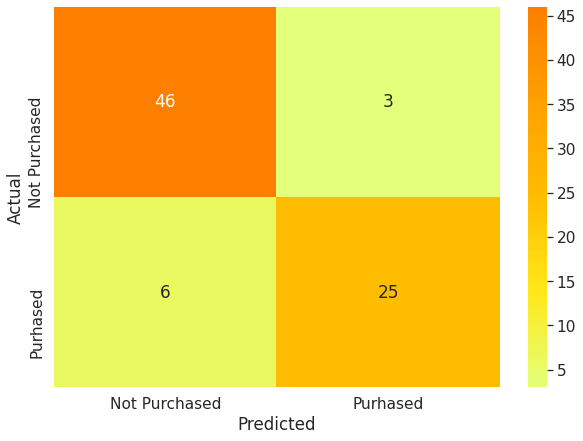

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Wistia", annot=True,annot_kws={"size": 17})

In [ ]:
# Getting the roc
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

Text(0.5, 0, 'fpr')

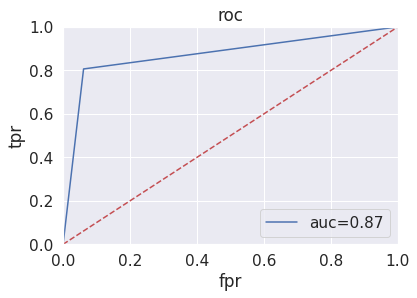

In [ ]:
# Plotting the roc-auc curve
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("tpr")
plt.xlabel("fpr")

# Saving Model

In [ ]:
# Exporting model
import pickle
pickle.dump(dtc,open('model.pkl','wb'))

In [ ]:
# Import & Predict
model=pickle.load(open('model.pkl','rb'))
model.predict(sc.fit_transform([[1,34,1900]]))

array([1])